In [1]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import bt
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
df = pd.DataFrame()

df = df.ta.ticker("INTC")


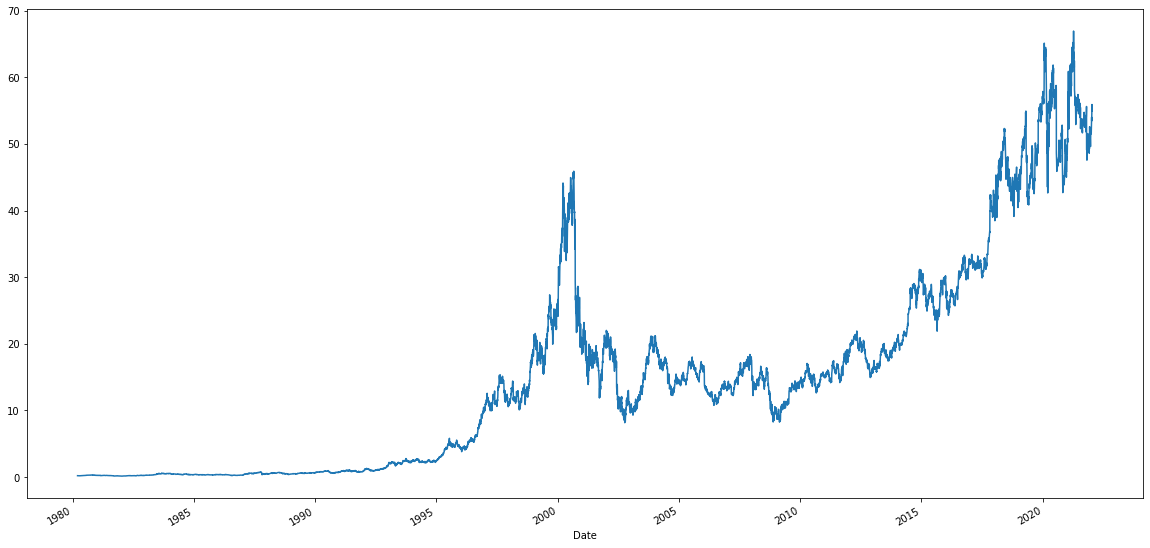

In [4]:
_ = df.Close.plot()

In [5]:
df["EMA_20"] = df.ta.ema(length=20, offset=1)
df["EMA_50"] = df.ta.ema(length=50, offset=1)

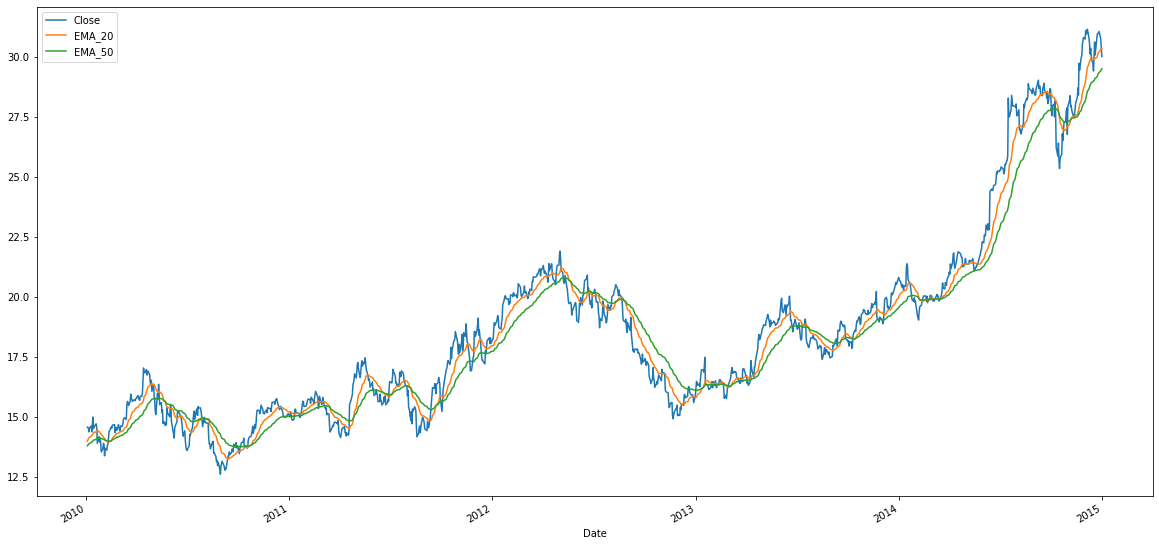

In [6]:
_ = df[["Close", "EMA_20", "EMA_50"]]["2010":"2014"].plot()

In [7]:
df["signal"] = np.sign(df["EMA_20"] - df["EMA_50"])
df["buy"] = df["signal"] - df["signal"].shift(1)
df.loc[df["buy"] != 0, "buy"] = df["buy"] / df["buy"].abs() 

In [8]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,EMA_20,EMA_50,signal,buy
Date,,,,,,,,,,,
2022-01-07,54.189999,54.389999,53.150002,53.439999,30702600,0.0,0.0,51.844510,51.373306,1.0,0.0
2022-01-10,53.970001,55.310001,53.310001,55.209999,49260800,0.0,0.0,51.996461,51.454353,1.0,0.0
2022-01-11,55.500000,56.080002,54.730000,55.910000,39795200,0.0,0.0,52.302512,51.601633,1.0,0.0
2022-01-12,56.139999,56.279999,54.810001,55.740002,29136800,0.0,0.0,52.646082,51.770589,1.0,0.0
2022-01-13,56.000000,56.200001,54.770000,54.939999,29454163,0.0,0.0,52.940741,51.926252,1.0,0.0


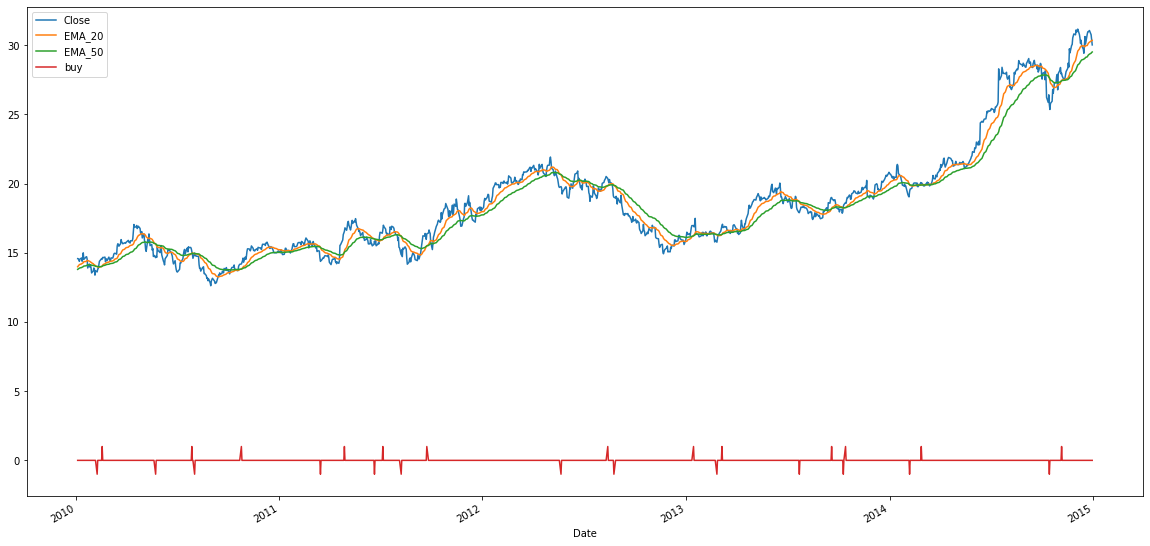

In [9]:
_ = df[["Close", "EMA_20", "EMA_50", "buy"]]["2010":"2014"].plot()

In [10]:
START_TIME = "2010-01-01"
END_TIME = "2020-01-01"

In [11]:
backtest_daily = bt.Strategy("EMA_paires_daily", algos=[
    bt.algos.RunDaily(),
    bt.algos.WeighTarget(df[START_TIME:END_TIME][["buy"]].rename(columns={"buy": "Close"})),
    bt.algos.Rebalance()
])
backtest_weekly = bt.Strategy("EMA_paires_weekly", algos=[
    bt.algos.RunWeekly(),
    bt.algos.WeighTarget(df[START_TIME:END_TIME][["buy"]].rename(columns={"buy": "Close"})),
    bt.algos.Rebalance()
])

In [12]:
backtest_daily = bt.Backtest(backtest_daily, df[START_TIME:END_TIME][['Close']])
backtest_weekly = bt.Backtest(backtest_weekly, df[START_TIME:END_TIME][['Close']])


In [13]:
bt_result = bt.run(backtest_daily, backtest_weekly)

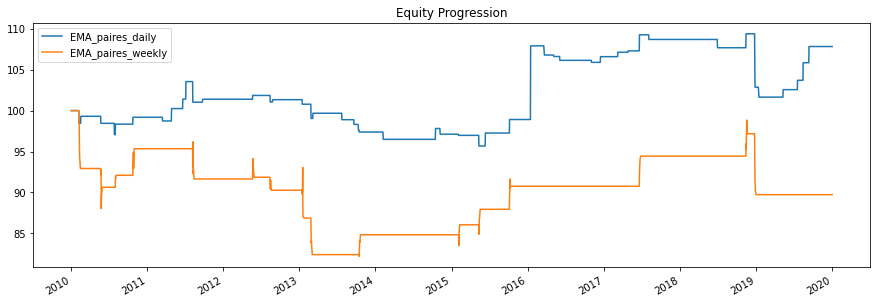

In [14]:
_ = bt_result.plot()

In [15]:
bt_result.get_transactions(strategy_name="EMA_paires_daily").tail()

,,price,quantity
Date,Security,,
2019-07-18,Close,46.920017,-22102.0
2019-08-13,Close,44.304607,-23408.0
2019-08-14,Close,43.387112,23408.0
2019-09-10,Close,49.015049,21595.0
2019-09-11,Close,49.932537,-21595.0


In [16]:
bt_result.display()

Stat                 EMA_paires_daily    EMA_paires_weekly
-------------------  ------------------  -------------------
Start                2010-01-03          2010-01-03
End                  2019-12-31          2019-12-31
Risk-free rate       0.00%               0.00%

Total Return         7.83%               -10.28%
Daily Sharpe         0.20                -0.20
Daily Sortino        0.35                -0.24
CAGR                 0.76%               -1.08%
Max Drawdown         -7.61%              -17.81%
Calmar Ratio         0.10                -0.06

MTD                  0.00%               0.00%
3m                   0.00%               0.00%
6m                   5.14%               0.00%
YTD                  4.83%               0.00%
1Y                   4.83%               0.00%
3Y (ann.)            0.39%               -0.38%
5Y (ann.)            2.12%               1.13%
10Y (ann.)           0.76%               -1.08%
Since Incep. (ann.)  0.76%               -1.08%

Daily Sharpe 

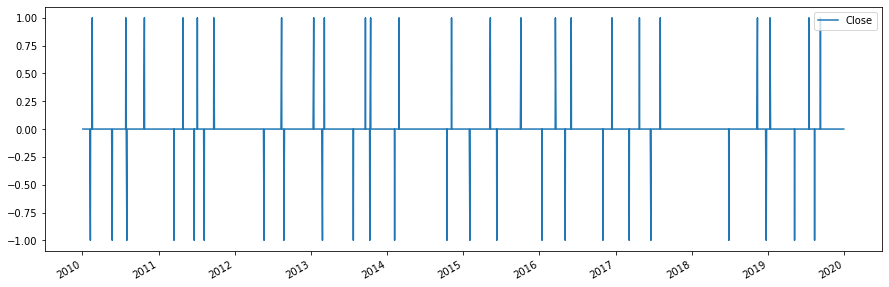

In [17]:
bt_result.plot_security_weights()